### Imports

In [1]:
from prepare import prep_telco_data
import acquire 
import env 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import scipy.stats as stats
from scipy.stats import  chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind




### Acquire and Prep Telco Data

In [2]:
# code to acquire telco data
df = acquire.new_telco_data()

In [3]:
df.shape


(7043, 24)

In [4]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,2,Yes,2,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,1,Yes,1,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,1,Yes,1,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,1,Yes,2,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [5]:
train, validate, test = prep_telco_data(df)

Train:(3937, 44)
Test:(1407, 44)
Val: (1688, 44)
Train Telco Data:
(3937, 44)
     customer_id  gender  senior_citizen  partner  dependents  tenure  \
5919  8331-ZXFOE  Female               0        0           0      58   
1915  2790-XUYMV    Male               0        0           1      71   
5054  7107-UBYKY  Female               0        1           1      35   
2355  3373-YZZYM    Male               0        1           1       1   
6279  8883-GRDWQ    Male               1        0           0      20   
...          ...     ...             ...      ...         ...     ...   
394   0581-MDMPW  Female               0        0           0      24   
3763  5299-RULOA  Female               0        1           1      10   
3444  4883-KCPZJ  Female               0        1           1      22   
1002  1452-KIOVK    Male               0        0           1      22   
4192  5919-VCZYM    Male               0        0           0       2   

      phone_service multiple_lines      onlin

In [6]:
column_dtypes = train.dtypes.tolist()
print(column_dtypes)

[dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8')]


In [7]:
column_dtypes = train.dtypes.reset_index()
column_dtypes.columns = ['Column', 'Data Type']
print(column_dtypes)


                                   Column Data Type
0                             customer_id    object
1                                  gender    object
2                          senior_citizen     int64
3                                 partner     int64
4                              dependents     int64
5                                  tenure     int64
6                           phone_service     int64
7                          multiple_lines    object
8                         online_security    object
9                           online_backup    object
10                      device_protection    object
11                           tech_support    object
12                           streaming_tv    object
13                       streaming_movies    object
14                      paperless_billing     int64
15                        monthly_charges   float64
16                          total_charges   float64
17                                  churn     int64
18          

#### Churning vs Not Churning

In [8]:
#this gets the number of churn vs no churn
train.churn.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

### Preview of Train Data

In [9]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,Female,0,0,0,58,1,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,2790-XUYMV,Male,0,0,1,71,1,Yes,Yes,Yes,...,0,0,0,1,0,1,0,1,0,0
5054,7107-UBYKY,Female,0,1,1,35,1,Yes,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,3373-YZZYM,Male,0,1,1,1,1,No,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,8883-GRDWQ,Male,1,0,0,20,1,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1


In [10]:
train.has_churned

5919    0
1915    0
5054    0
2355    0
6279    0
       ..
394     0
3763    1
3444    0
1002    0
4192    0
Name: has_churned, Length: 3937, dtype: int64

In [11]:
train.churn.unique()

array([0, 1])

In [12]:
train.describe()

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,has_churned,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,...,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.161290,0.485141,0.302769,32.775210,0.905258,0.590297,64.805131,2316.775641,0.265685,0.265685,...,0.386335,0.220218,0.391415,0.207010,0.243078,0.437389,0.220218,0.227330,0.327407,0.226314
std,0.367845,0.499843,0.459514,24.709604,0.292896,0.491841,30.294804,2284.984394,0.441753,0.441753,...,0.486971,0.414447,0.488129,0.405215,0.428997,0.496127,0.414447,0.419161,0.469327,0.418498
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.850000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,34.700000,396.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,30.000000,1.000000,1.000000,70.250000,1414.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,90.300000,3893.600000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.650000,8594.400000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Explore

In [13]:
train.nunique()

customer_id                              3937
gender                                      2
senior_citizen                              2
partner                                     2
dependents                                  2
tenure                                     72
phone_service                               2
multiple_lines                              3
online_security                             3
online_backup                               3
device_protection                           3
tech_support                                3
streaming_tv                                3
streaming_movies                            3
paperless_billing                           2
monthly_charges                          1331
total_charges                            3748
churn                                       2
contract_type                               3
internet_service_type                       3
payment_type                                4
has_churned                       

In [14]:
train.dtypes

customer_id                               object
gender                                    object
senior_citizen                             int64
partner                                    int64
dependents                                 int64
tenure                                     int64
phone_service                              int64
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                          int64
monthly_charges                          float64
total_charges                            float64
churn                                      int64
contract_type                             object
internet_service_type                     object
payment_type        

In [15]:
columns = train.select_dtypes(include='number')

range_of_columns = columns.max() - columns.min()
range_of_columns

senior_citizen                              1.00
partner                                     1.00
dependents                                  1.00
tenure                                     71.00
phone_service                               1.00
paperless_billing                           1.00
monthly_charges                           100.40
total_charges                            8575.55
churn                                       1.00
has_churned                                 1.00
gender_female                               1.00
multiple_lines_No phone service             1.00
multiple_lines_Yes                          1.00
online_security_No internet service         1.00
online_security_Yes                         1.00
online_backup_No internet service           1.00
online_backup_Yes                           1.00
device_protection_No internet service       1.00
device_protection_Yes                       1.00
tech_support_No internet service            1.00
tech_support_Yes    

In [16]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'has_churned', 'gender_female',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet

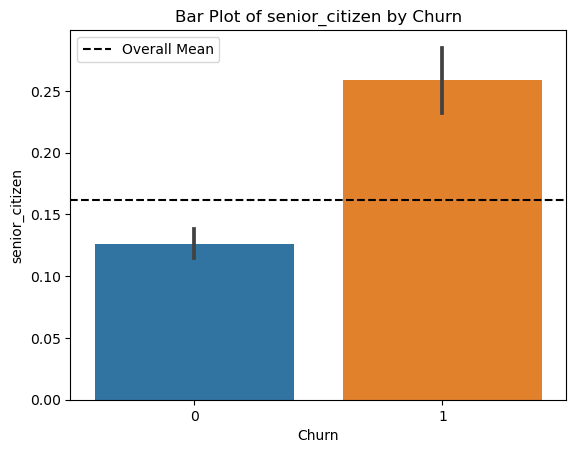

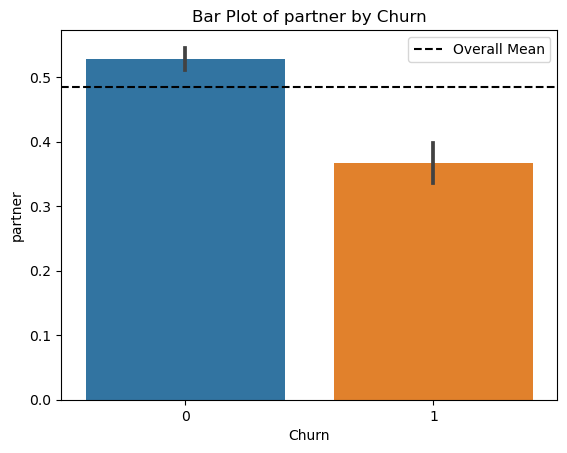

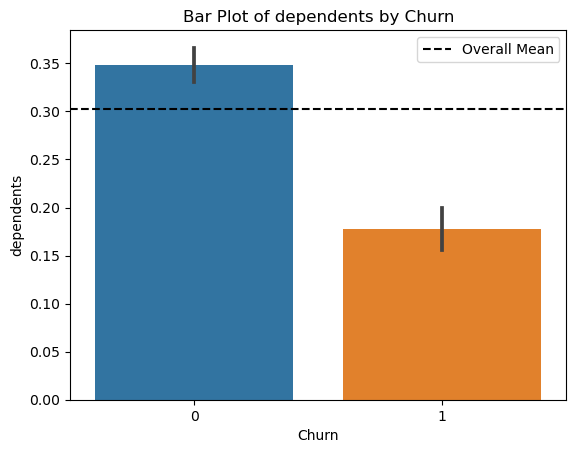

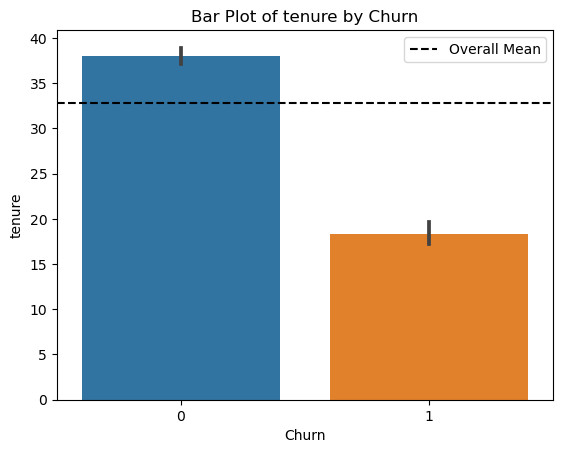

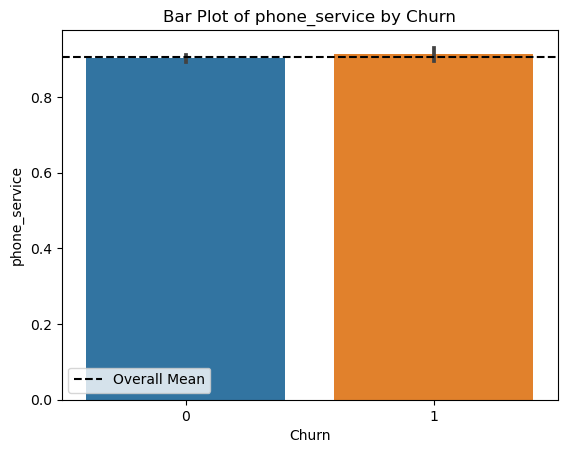

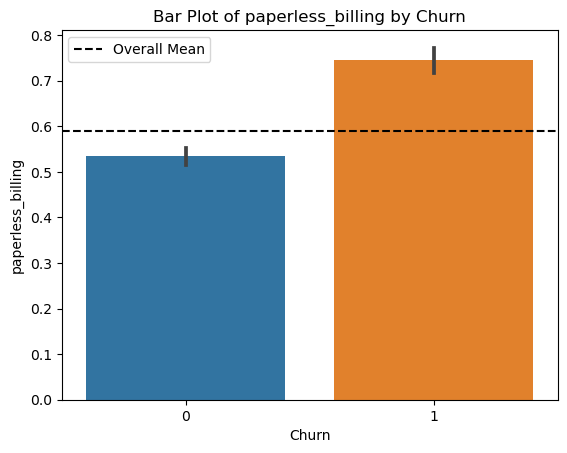

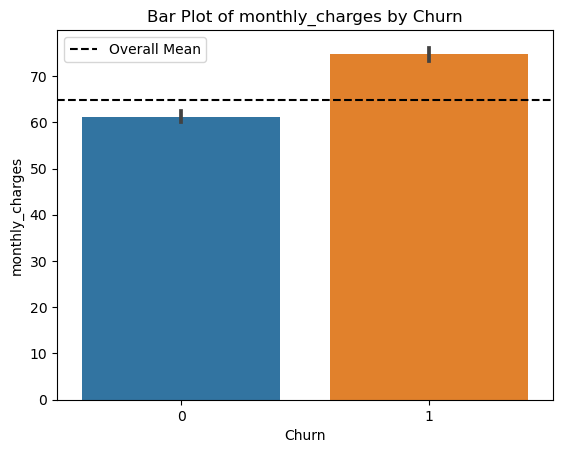

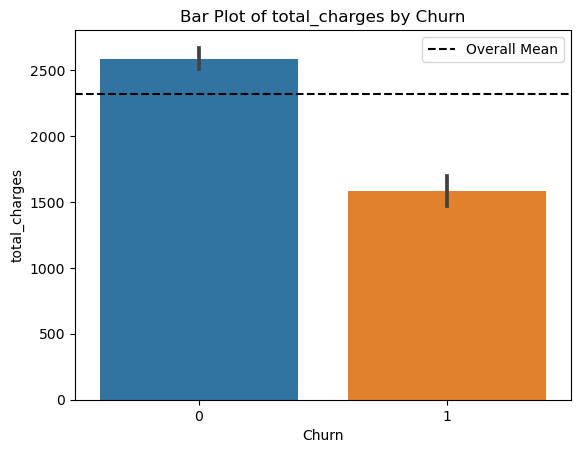

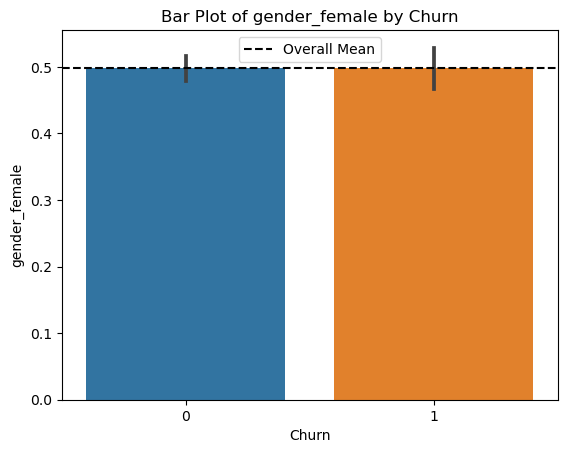

In [17]:
for column in train.columns:
    
    if train[column].dtype in ['int64', 'float64'] and column != 'churn' and column != 'has_churned':
        
        plt.figure()
        sns.barplot(x='churn', y=column, data=train)
        plt.title(f'Bar Plot of {column} by Churn')
        plt.xlabel('Churn')
        plt.ylabel(column)

        overall_mean = train[column].mean()
        plt.axhline(overall_mean, color='black', linestyle='--', label='Overall Mean')
        plt.legend()

        plt.show()

In [18]:
for column in train.columns:

    statistics = train[column].describe()
    print(f'Descriptive Statistics of {column}:\n{statistics}\n')

Descriptive Statistics of customer_id:
count           3937
unique          3937
top       8331-ZXFOE
freq               1
Name: customer_id, dtype: object

Descriptive Statistics of gender:
count     3937
unique       2
top       Male
freq      1976
Name: gender, dtype: object

Descriptive Statistics of senior_citizen:
count    3937.000000
mean        0.161290
std         0.367845
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen, dtype: float64

Descriptive Statistics of partner:
count    3937.000000
mean        0.485141
std         0.499843
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: partner, dtype: float64

Descriptive Statistics of dependents:
count    3937.000000
mean        0.302769
std         0.459514
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: dependents, dtype: float64

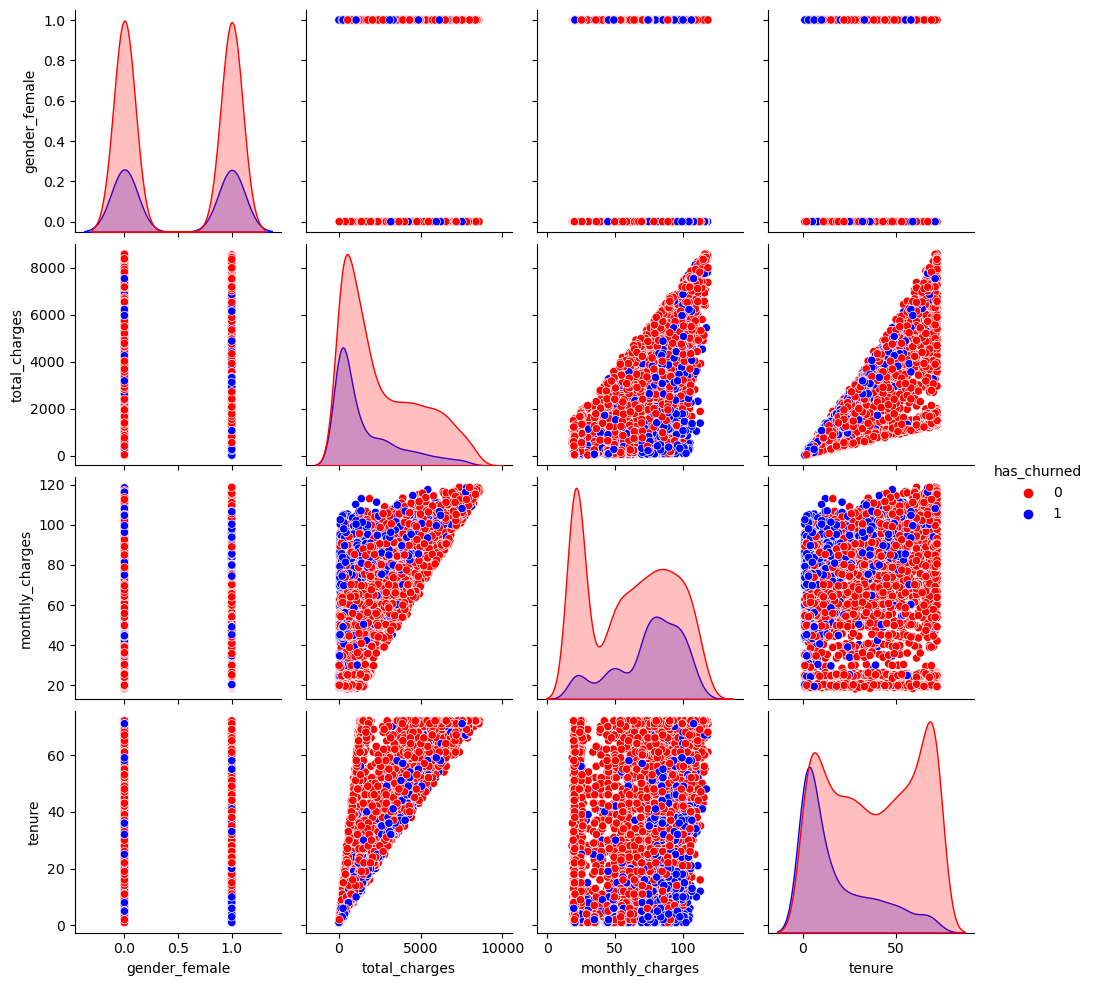

In [19]:
train['churn'] = train['has_churned'].map({0: 'No', 1: 'Yes'})
measurements = ['gender_female', 'total_charges', 'monthly_charges', 'tenure']

sns.pairplot(data=train, vars=measurements, hue='has_churned', palette={0: 'red', 1: 'blue'})
plt.show()


#### If you spend more monthly are you more likely to churn

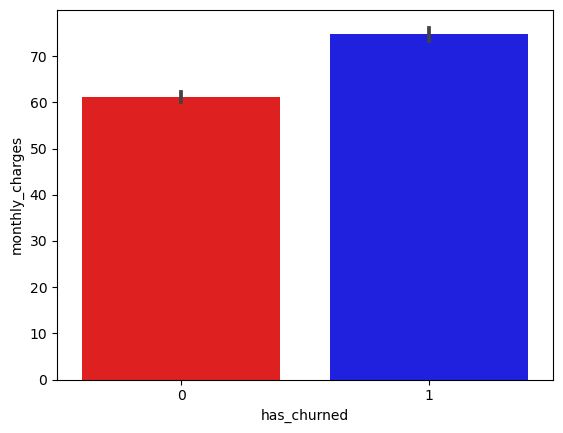

In [20]:
sns.barplot(data=train, x='has_churned', y = 'monthly_charges', palette={0: 'red', 1: 'blue'})
plt.show()

```
H0: There is not an association between monthly charges and churn
Ha: There is an association between monthly charges and churn
```

In [21]:
alpha = 0.05

In [22]:
train.has_churned.value_counts()

0    2891
1    1046
Name: has_churned, dtype: int64

In [23]:
churned = train[train['has_churned'] == 1]['monthly_charges']
not_churned = train[train['has_churned'] == 0]['monthly_charges']

t_statistic, p_value = stats.ttest_ind(churned, not_churned)

print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: 12.596140325128877
p-value: 1.0736272928972876e-35


In [24]:
p_value

1.0736272928972876e-35

In [25]:
p_value < alpha

True

We can reject the null hypothesis

in conclusion: There is an association between monthly charges and churn

#### Does the total charges affect whether or not a customer churns

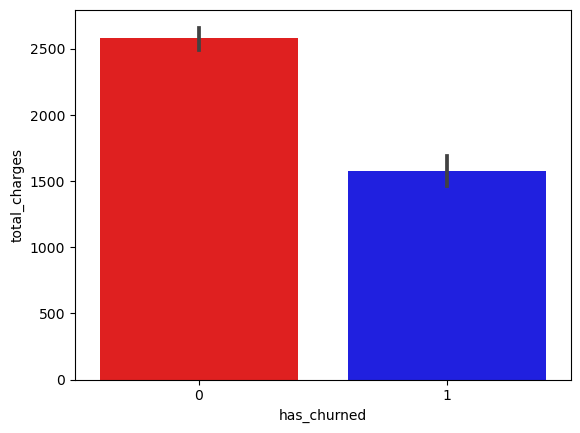

In [26]:
sns.barplot(data=train, x='has_churned', y = 'total_charges', palette={0: 'red', 1: 'blue'})
plt.show()

```
H0: There is not an association between total charges and churn
Ha: There is an association between total charges and churn
```

In [27]:
alpha = 0.05

In [28]:
churned = train[train['has_churned'] == 1]['total_charges']
not_churned = train[train['has_churned'] == 0]['total_charges']

t_statistic, p_value = stats.ttest_ind(churned, not_churned)

print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: -12.390188331427497
p-value: 1.2955473562990627e-34


In [29]:
p_value

1.2955473562990627e-34

In [30]:
p_value < alpha

True

We can successfully reject the null hypothesis

in conclusion: There is an association between total charges and churn

#### Do males churn more than females?

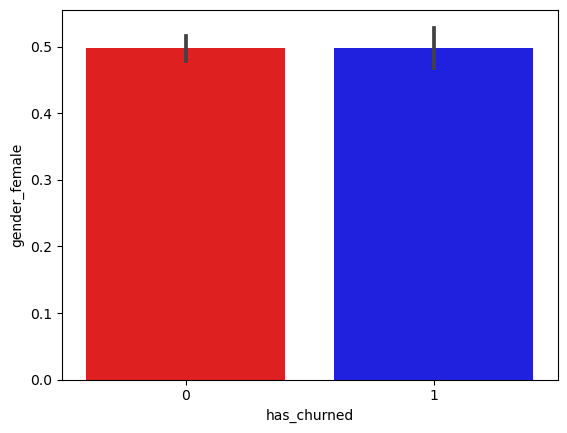

In [31]:
sns.barplot(data=train, x='has_churned', y = 'gender_female', palette={0: 'red', 1: 'blue'})
plt.show()

In [32]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,Female,0,0,0,58,1,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,2790-XUYMV,Male,0,0,1,71,1,Yes,Yes,Yes,...,0,0,0,1,0,1,0,1,0,0
5054,7107-UBYKY,Female,0,1,1,35,1,Yes,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,3373-YZZYM,Male,0,1,1,1,1,No,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,8883-GRDWQ,Male,1,0,0,20,1,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1


```
H0: gender is independent of churn
Ha: gender is dependent of churn
```

In [33]:
alpha = 0.05

In [34]:
contingency_table = pd.crosstab(train['gender_female'], train['has_churned'])
contingency_table

has_churned,0,1
gender_female,,
0,1451,525
1,1440,521


<Axes: xlabel='has_churned', ylabel='gender_female'>

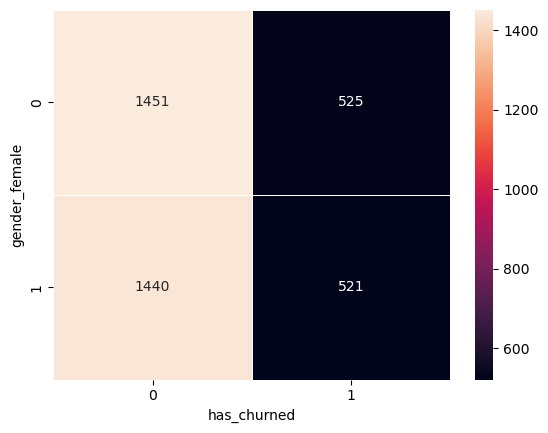

In [35]:
sns.heatmap(contingency_table, annot = True, fmt ='d', linewidths = .5)

In [36]:
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

In [37]:
p_val

1.0

In [38]:
p_val < alpha

False

We fail to reject the null hypothesis

in conclusion: gender is independent of churn

#### Does how long you've been a customer have significance for whether you churn or not

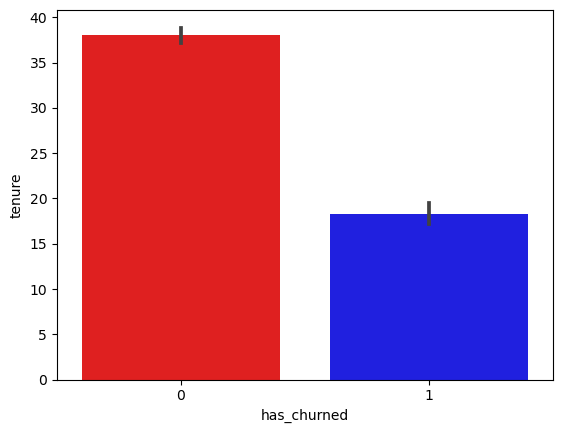

In [39]:
sns.barplot(data=train, x='has_churned', y = 'tenure', palette={0: 'red', 1: 'blue'})
plt.show()

```
H0:  There is not an association between tenure and churn
Ha:  There is an association between tenure and churn
```

In [40]:
alpha = 0.05

In [41]:
churned = train[train['has_churned'] == 1]['tenure']
not_churned = train[train['has_churned'] == 0]['tenure']

t_statistic, p_value = stats.ttest_ind(churned, not_churned)

print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: -23.57581121525426
p-value: 4.577513863553669e-115


In [42]:
p_value < alpha

True

We can successfully reject the null hypothesis

in conclusion: There is an association between tenure and churn

### Modeling

### KNN

In [43]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'has_churned', 'gender_female',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet

In [44]:
X_train = train.drop(columns=['customer_id','gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing','churn','has_churned',
       'contract_type', 'internet_service_type', 'payment_type',
       'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check','gender_female'])
      
y_train = train.has_churned

X_validate = validate.drop(columns=['customer_id','gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing','churn','has_churned',
       'contract_type', 'internet_service_type', 'payment_type',
       'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check','gender_female'])
y_validate = validate.has_churned

X_test = test.drop(columns=['customer_id','gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing','churn','has_churned',
       'contract_type', 'internet_service_type', 'payment_type',
       'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check','gender_female'])
y_test = test.has_churned

In [45]:
knn = KNeighborsClassifier(n_neighbors=1) 
knn

KNeighborsClassifier(n_neighbors=1)

##### fit it

In [46]:
knn.fit(X_train, y_train)  


KNeighborsClassifier(n_neighbors=1)

In [47]:
y_pred = knn.predict(X_train)

In [48]:
y_pred[:5]

array([0, 0, 0, 0, 0])

In [49]:
y_pred_proba = knn.predict_proba(X_train)

In [50]:
y_pred_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

##### baseline

In [51]:
baseline_prediction = y_train.mode()
pd.Series((baseline_prediction[0]), range(len(y_train)))

0       0
1       0
2       0
3       0
4       0
       ..
3932    0
3933    0
3934    0
3935    0
3936    0
Length: 3937, dtype: int64

In [52]:
def establish_baseline(y_train):
    baseline_prediction = y_train.mode()
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    
    return accuracy

establish_baseline(y_train)

0.7343154686309372

##### baseline accuracy is 73%

##### accuracy

In [53]:
print('Accuracy of KNN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.99


In [54]:
print('Accuracy of KNN classifier on val set: {:.2f}'
      .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on val set: 0.70


##### model beats baseline

##### confusion matrix

In [55]:
cm = confusion_matrix(y_train,y_pred)
cm

array([[2881,   10],
       [  32, 1014]])

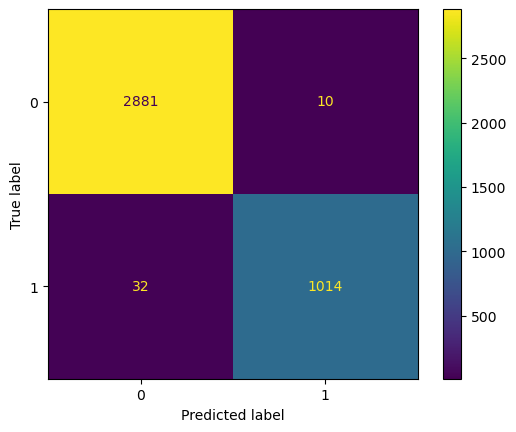

In [56]:
ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train)

##### classification report

In [57]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2891
           1       0.99      0.97      0.98      1046

    accuracy                           0.99      3937
   macro avg       0.99      0.98      0.99      3937
weighted avg       0.99      0.99      0.99      3937



In [58]:
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]

accuracy = (tp + tn) / (tn + fp + fn + tp)
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

support_pos = tp + fn
support_neg = fp + tn

evaluation_metrics = {
    'metric': [
        'accuracy',
        'true_positive_rate',
        'false_positive_rate',
        'true_negative_rate',
        'false_negative_rate',
        'precision',
        'recall',
        'f1_score',
        'support_pos',
        'support_neg'
    ],
    'score': [
        accuracy,
        true_positive_rate,
        false_positive_rate,
        true_negative_rate,
        false_negative_rate,
        precision,
        recall,
        f1_score,
        support_pos,
        support_neg
    ]
}

metrics_df = pd.DataFrame(evaluation_metrics)


In [59]:
metrics_df

,metric,score
0,accuracy,0.989332
1,true_positive_rate,0.969407
2,false_positive_rate,0.003459
3,true_negative_rate,0.996541
4,false_negative_rate,0.030593
5,precision,0.990234
6,recall,0.969407
7,f1_score,0.979710
8,support_pos,1046.000000
9,support_neg,2891.000000


##### best models

In [60]:
model_set = []
model_accuracies = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    model_set.append(knn)
    model_accuracies.append({
        'neighbors': i,
        'train_score': round(knn.score(X_train, y_train), 2),
        'validate_score': round(knn.score(X_validate, y_validate), 2),
        'score_diff': round(knn.score(X_train, y_train) - knn.score(X_validate, y_validate), 2)
        
    })


In [61]:
best_models = pd.DataFrame(model_accuracies)

In [62]:
best_models.sort_values(by = 'score_diff', ascending = True)

,neighbors,train_score,validate_score,score_diff
19,20,0.79,0.77,0.02
14,15,0.80,0.78,0.02
13,14,0.80,0.78,0.02
17,18,0.80,0.77,0.03
16,17,0.80,0.77,0.03
15,16,0.80,0.77,0.03
12,13,0.81,0.77,0.03
7,8,0.81,0.78,0.03
8,9,0.82,0.78,0.03
18,19,0.80,0.77,0.03


##### Model where k = 9 would be the best model to use with train score of 0.82, validation score of 0.78 and a scored difference of 0.04.

In [63]:
knn = KNeighborsClassifier(n_neighbors=9) 
knn

KNeighborsClassifier(n_neighbors=9)

In [64]:
knn.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=9)

In [65]:
model_set = []
model_accuracy = []    
    
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
model_set.append(knn)
model_accuracy.append({
        'neighbors': 9,
        'train_score': round(knn.score(X_train, y_train), 2),
        'validate_score': round(knn.score(X_validate, y_validate), 2),
        'score_diff': round(knn.score(X_train, y_train) - knn.score(X_validate, y_validate), 2),
       
        
    })


In [66]:
pd.DataFrame(model_accuracy)

,neighbors,train_score,validate_score,score_diff
0,9,0.82,0.78,0.03


### RandomForest

In [67]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)


#### fit it

In [68]:
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=123)

##### feature importances

In [69]:
print(rf.feature_importances_)

[0.28843482 0.36696534 0.34459984]


##### predict and prob

In [70]:
y_pred = rf.predict(X_train)
y_pred[0:5]


array([0, 0, 0, 0, 0])

In [71]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.95577929, 0.04422071],
       [0.9954632 , 0.0045368 ],
       [0.97899999, 0.02100001],
       [0.95382929, 0.04617071],
       [0.92291489, 0.07708511]])

##### confusion matrix

In [72]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[2768,  123],
       [ 402,  644]])

##### classification report

In [73]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2891
           1       0.84      0.62      0.71      1046

    accuracy                           0.87      3937
   macro avg       0.86      0.79      0.81      3937
weighted avg       0.86      0.87      0.86      3937



##### visual

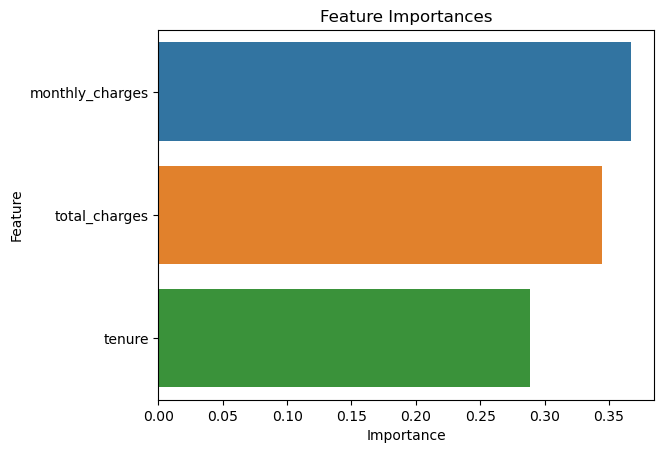

In [74]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances })

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot( y=feature_importances['Feature'], x=feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')


plt.title('Feature Importances')
plt.show()

In [75]:
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn)/(tn + fp + fn + tp)

true_positive_rate = tp/(tp + fn)
false_positive_rate = fp/(fp + tn)
true_negative_rate = tn/(tn + fp)
false_negative_rate = fn/(fn + tp)

precision = tp/(tp + fp)
recall = tp/(tp + fn)
f1_score = 2*(precision*recall)/(precision+recall)

support_pos = tp + fn
support_neg = fp + tn

dict = {
    'metric' : ['accuracy'
                ,'true_positive_rate'
                ,'false_positive_rate'
                ,'true_negative_rate'
                ,'false_negative_rate'
                ,'precision'
                ,'recall'
                ,'f1_score'
                ,'support_pos'
                ,'support_neg']
    ,'score' : [accuracy
                ,true_positive_rate
                ,false_positive_rate
                ,true_negative_rate
                ,false_negative_rate
                ,precision
                ,recall
                ,f1_score
                ,support_pos
                ,support_neg]
}

pd.DataFrame(dict)

,metric,score
0,accuracy,0.866650
1,true_positive_rate,0.615679
2,false_positive_rate,0.042546
3,true_negative_rate,0.957454
4,false_negative_rate,0.384321
5,precision,0.839635
6,recall,0.615679
7,f1_score,0.710425
8,support_pos,1046.000000
9,support_neg,2891.000000


##### accuracy

In [76]:
print('Accuracy of Random Tree classifier on training set: {:.2f}'
      .format(rf.score(X_train, y_train)))

Accuracy of Random Tree classifier on training set: 0.87


##### higher than baseline

#### model scores

In [77]:
model_set = []
model_accuracies = []

for i in range(1, 21):
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(X_train, y_train)
    train_score = round(rf.score(X_train, y_train), 2)
    validate_score = round(rf.score(X_validate, y_validate), 2)
    score_difference = train_score - validate_score

    
    model_set.append(rf)
    model_accuracies.append({
        'max_depth': i,
        'train_score': train_score,
        'validate_score': validate_score,
        'score_diff': score_difference
        
        
    })

In [78]:
best_models2 = pd.DataFrame(model_accuracies)
best_models2.sort_values(by = 'score_diff', ascending = True)

,max_depth,train_score,validate_score,score_diff
0,1,0.73,0.73,0.00
1,2,0.77,0.75,0.02
2,3,0.80,0.78,0.02
4,5,0.80,0.78,0.02
3,4,0.80,0.77,0.03
5,6,0.81,0.78,0.03
6,7,0.82,0.78,0.04
7,8,0.83,0.78,0.05
8,9,0.85,0.78,0.07
9,10,0.86,0.78,0.08


### Best model for RF is where max_depth = 6 with a train score of 0.81, a validation score of 0.78 and a score difference of 0.03

In [79]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=123)

In [80]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=123)

In [81]:
model_set = []
model_accuracy = [] 
    
rf = RandomForestClassifier(max_depth=6)
rf.fit(X_train, y_train)
train_score = round(rf.score(X_train, y_train), 2)
validate_score = round(rf.score(X_validate, y_validate), 2)
score_difference = train_score - validate_score


model_set.append(rf)
model_accuracy.append({
        'max_depth': 6,
        'train_score': train_score,
        'validate_score': validate_score,
        'score_diff': score_difference,
        
        
 })




In [82]:
pd.DataFrame(model_accuracy)

,max_depth,train_score,validate_score,score_diff
0,6,0.81,0.78,0.03


### LogisticRegression

In [83]:
logit = LogisticRegression(C=1, random_state=123)


##### fit it

In [84]:
logit.fit(X_train, y_train)


LogisticRegression(C=1, random_state=123)

##### feature importance

In [85]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.07052523  0.03062186  0.00018203]]
Intercept: 
 [-1.60443519]


##### predict and prob

In [86]:
y_pred = logit.predict(X_train)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [87]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[:5]

array([[0.93906652, 0.06093348],
       [0.94772978, 0.05227022],
       [0.95785803, 0.04214197],
       [0.74716062, 0.25283938],
       [0.76299217, 0.23700783]])

##### baseline

In [88]:
baseline_prediction = y_train.mode()
pd.Series((baseline_prediction[0]), range(len(y_train)))

0       0
1       0
2       0
3       0
4       0
       ..
3932    0
3933    0
3934    0
3935    0
3936    0
Length: 3937, dtype: int64

In [89]:
def establish_baseline(y_train):
    baseline_prediction = y_train.mode()
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    
    return accuracy

establish_baseline(y_train)


0.7343154686309372

##### accuracy

In [90]:
print('Accuracy of Logistic Regression classifier 1 on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier 1 on training set: 0.79


##### model beats baseline

In [91]:
print('Accuracy of Logistic Regression classifier 1 on validation set: {:.2f}'
     .format(logit.score(X_validate, y_validate)))

Accuracy of Logistic Regression classifier 1 on validation set: 0.78


##### confusion matrix

In [92]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[2627,  264],
       [ 582,  464]])

##### classification report

In [93]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2891
           1       0.64      0.44      0.52      1046

    accuracy                           0.79      3937
   macro avg       0.73      0.68      0.69      3937
weighted avg       0.77      0.79      0.77      3937



##### visual

In [94]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

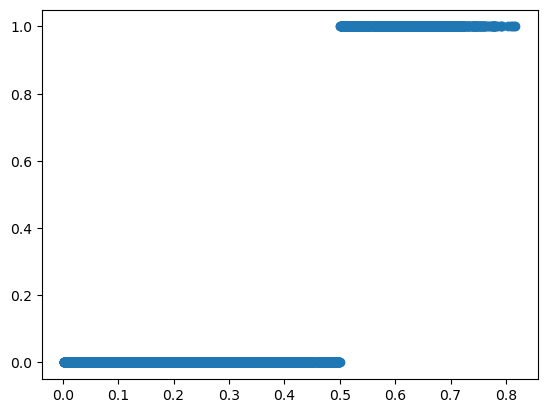

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(y_pred_proba, y_pred)

In [96]:
model_set = []
model_accuracy = []


logi = LogisticRegression(C=1)
logit.fit(X_train, y_train)
train_score = round(logit.score(X_train, y_train), 2)
validate_score = round(logit.score(X_validate, y_validate), 2)
score_difference = train_score - validate_score



model_set.append(logi)
model_accuracy.append({
    'C': 1,
    'train_score': train_score,
    'validate_score': validate_score,
    'score_diff': score_difference,
    


    

})


In [97]:
model_accuracydf = pd.DataFrame(model_accuracy)
model_accuracydf

,C,train_score,validate_score,score_diff
0,1,0.79,0.78,0.01


###### In Summary:
#### KNN model had a train accuracy of 82% which was 9% over baseline, a validation score of 78%
#### RandomForest model had a train accuracy of 81% which was 8% over baseline, a validation score of 78%
#### Logistic Regression model had a train accuracy of 79% which was 6% over baseline, a validation score of 78%




### The KNN model has a higher accuracy of 82% compared to the RandomForest model's accuracy of 81% and the Logistic Regression model's accuracy of 79%, and the validation scores are the same at 78% for all models, then based on the accuracy metric and a very low score difference, the KNN model would be the recommended choice.

In [98]:
knn = KNeighborsClassifier(n_neighbors=9) 
knn

KNeighborsClassifier(n_neighbors=9)

In [99]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [100]:
model_set = []
model_accuracy = []    
    
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
model_set.append(knn)
test_score = round(knn.score(X_test, y_test), 2)
model_accuracy.append({
        'neighbors': 9,
        'train_score': round(knn.score(X_train, y_train), 2),
        'validate_score': round(knn.score(X_validate, y_validate), 2),
        'score_diff': round(knn.score(X_train, y_train) - knn.score(X_validate, y_validate), 2),
        'Test_Score' : test_score
        
    })



In [101]:
best_model = pd.DataFrame(model_accuracy)

In [102]:
best_model

,neighbors,train_score,validate_score,score_diff,Test_Score
0,9,0.82,0.78,0.03,0.78


### KNN test score came out to 78%

### Predictions CSV

In [103]:
df = acquire.new_telco_data()

In [104]:
train, validate, test = prep_telco_data(df)

Train:(3937, 44)
Test:(1407, 44)
Val: (1688, 44)
Train Telco Data:
(3937, 44)
     customer_id  gender  senior_citizen  partner  dependents  tenure  \
5919  8331-ZXFOE  Female               0        0           0      58   
1915  2790-XUYMV    Male               0        0           1      71   
5054  7107-UBYKY  Female               0        1           1      35   
2355  3373-YZZYM    Male               0        1           1       1   
6279  8883-GRDWQ    Male               1        0           0      20   
...          ...     ...             ...      ...         ...     ...   
394   0581-MDMPW  Female               0        0           0      24   
3763  5299-RULOA  Female               0        1           1      10   
3444  4883-KCPZJ  Female               0        1           1      22   
1002  1452-KIOVK    Male               0        0           1      22   
4192  5919-VCZYM    Male               0        0           0       2   

      phone_service multiple_lines      onlin

In [105]:
knn = KNeighborsClassifier(n_neighbors=9)


In [106]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [107]:
train_customer_ids = train['customer_id'].values
test_customer_ids = test['customer_id'].values

y_pred_test = knn.predict(X_test)
y_proba_test = knn.predict_proba(X_test)[:, 1]


predictions = pd.DataFrame({
    'customer_id': test_customer_ids,
    'probability_of_churn': y_proba_test,
    'prediction_of_churn': y_pred_test
})


predictions['prediction_of_churn'] = np.where(predictions['prediction_of_churn'] == 1, 'churn', 'not_churn')


predictions.to_csv('churn_predictions.csv', index=False)
